In [84]:
import json

with open("./data/turn_times.json") as f:
    turn_times = json.load(f)
    
with open("./data/game_results.json") as f:
    game_results = json.load(f)
    
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib
from matplotlib.pyplot import cm
import numpy

Average time (ms), min_max_1: 0.3835
Average time (ms), min_max_2: 1.0011
Average time (ms), min_max_3: 3.4846
Average time (ms), min_max_4: 85.0891
Average time (ms), random: 0.0345
Average time (ms), min_max_alpha_beta_3: 3.8269
Average time (ms), min_max_alpha_beta_4: 10.7714
Average time (ms), min_max_alpha_beta_5: 44.4703


Text(0.5,1,'AI turn time')

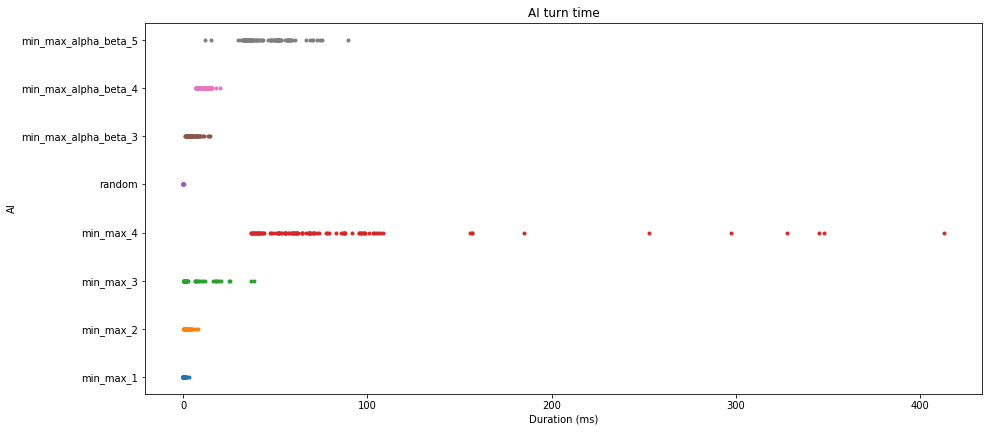

In [83]:
plt.subplots(figsize=(15,15))
plt.subplot(2, 1, 1)

for ai, times in turn_times.items():
    print("Average time (ms), {}: {:.4f}".format(ai, numpy.mean(times)/1000000))
    x_plots = []
    y_plots = []
    for time in times:
        x_plots.append(time/1000000)
        y_plots.append(ai)
    plt.plot(x_plots, y_plots, linestyle='', marker='.')
plt.xlabel('Duration (ms)')
plt.ylabel('AI')
plt.title('AI turn time')


It's interesting how the tail of durations grows as depth increases.
This is presumably because 